In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import scipy.linalg

iris = np.genfromtxt('data/iris.txt', delimiter=None)

X, Y = iris[:,0:2], iris[:,-1]

1(a) Clustering

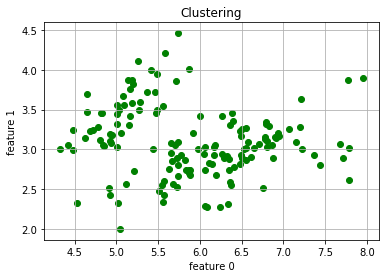

In [2]:
plt.scatter(X[:,0],X[:,1],color='g')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.title('Clustering')
plt.grid(True)
plt.show()

1(b) K-means

/Users/smitha/Desktop/ML/HW5-code/mltools/plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
/Users/smitha/Desktop/ML/HW5-code/mltools/plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/smitha/Desktop/ML/HW5-code/mltools/plot.py:64: MatplotlibDeprecationW

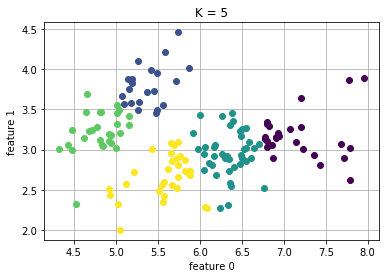

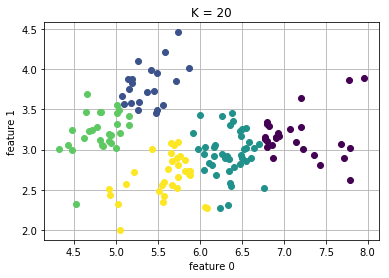

In [3]:
a,c,d = ml.cluster.kmeans(X,5)
ml.plotClassify2D(None, X, a)
plt.title('K = 5')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.grid(True)
plt.show()

z,c,d = ml.cluster.kmeans(X,20)
ml.plotClassify2D(None, X, a)
plt.title('K = 20')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.grid(True)
plt.show()

1(c) Agglomerative clustering


The difference between k-means and agglomerative clusters is that agglomerative clusters are dendograms. It will produce a minimum spanning tree if we use minimum distance between clusters while maximum distance will avoid elongated clusters. This is shown in the single and complete linkage for each as single linkage has a few clusters that take up the majority while the rest are small or single nodes. K-means base each cluster on a center point. The
initialization of each center may change how the clusters look. 

/Users/smitha/Desktop/ML/HW5-code/mltools/plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
/Users/smitha/Desktop/ML/HW5-code/mltools/plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/smitha/Desktop/ML/HW5-code/mltools/plot.py:64: MatplotlibDeprecationW

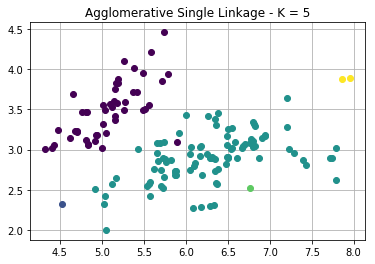

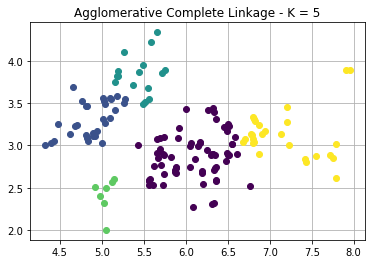

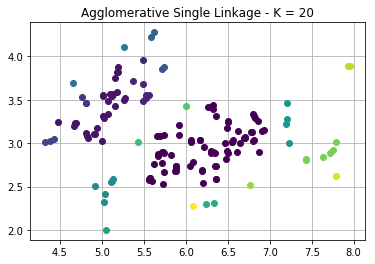

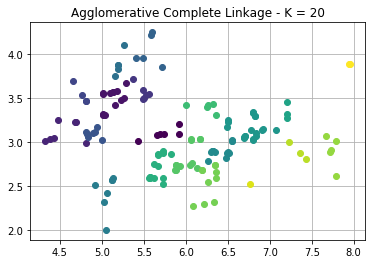

In [4]:
a, c = ml.cluster.agglomerative(X, 5, method='min')
plt.title("Agglomerative Single Linkage - K = 5");
ml.plotClassify2D(None, X, a);
plt.grid(True)
plt.show()

a, c = ml.cluster.agglomerative(X, 5, method='max')
plt.title("Agglomerative Complete Linkage - K = 5");
ml.plotClassify2D(None, X, a);
plt.grid(True)
plt.show()

a, c = ml.cluster.agglomerative(X, 20, method='min')
plt.title("Agglomerative Single Linkage - K = 20");
ml.plotClassify2D(None, X, a);
plt.grid(True)
plt.show()

a, c = ml.cluster.agglomerative(X, 20, method='max')
plt.title("Agglomerative Complete Linkage - K = 20");
ml.plotClassify2D(None, X, a);
plt.grid(True)
plt.show()

Problem 2: Eigenfaces

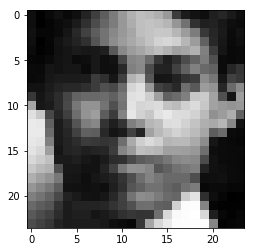

In [5]:
X = np.genfromtxt("data/faces.txt", delimiter=None) 
plt.figure()
img = np.reshape(X[5,:],(24,24)) 
plt.imshow( img.T , cmap="gray") 
plt.show()

2(a)

In [6]:
mean = np.mean(X)
X0 = X-mean
print("X0 = ",X0)

X0 =  [[ -23.26595979  -19.26595979  -25.26595979 ...  -37.26595979
  -102.26595979 -110.26595979]
 [ -97.26595979 -100.26595979  -97.26595979 ...  -38.26595979
   -75.26595979 -113.26595979]
 [-113.26595979 -111.26595979 -110.26595979 ...  -54.26595979
   -56.26595979  -56.26595979]
 ...
 [ -99.26595979  -99.26595979 -100.26595979 ...  -91.26595979
   -89.26595979  -84.26595979]
 [ -54.26595979  -52.26595979  -51.26595979 ...  -88.26595979
   -88.26595979  -88.26595979]
 [ -62.26595979  -65.26595979  -64.26595979 ...  133.73404021
   132.73404021  133.73404021]]


2(b)

In [7]:
U, S, V = scipy.linalg.svd(X0, full_matrices=False)
W = U.dot(np.diag(S))

2(c)

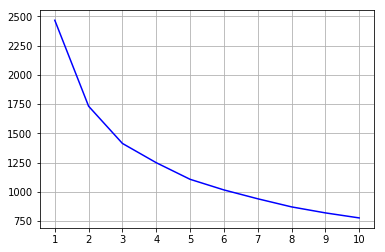

In [8]:
mse = []
for k in range(1, 11):
    X0hat = W[:, :k].dot(V[:k,:])
    mse.append(np.mean((X0 - X0hat)**2))
_, axis = plt.subplots()
axis.plot(range(1,11), mse, c='blue')
axis.set_xticks(range(1,11))
plt.grid(True)
plt.show()

2(d) and 2(e)

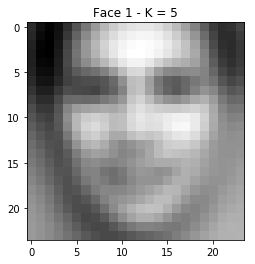

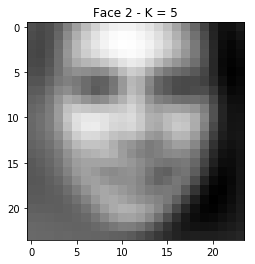

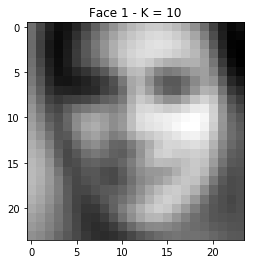

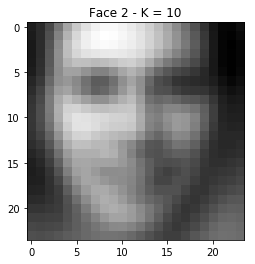

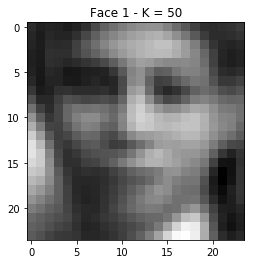

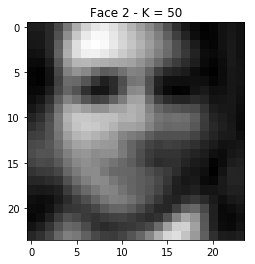

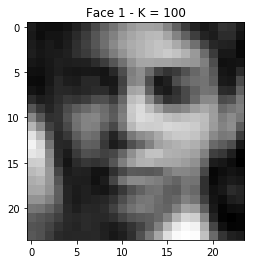

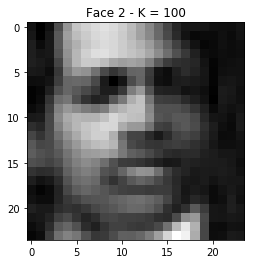

In [9]:
K = [5,10,50,100]
for k in K:
    X0hat = W[:, :k].dot(V[:k,:])
    f1 = X0hat[5,:]
    f2 = X0hat[6,:]
    img = np.reshape(f1,(24,24))
    plt.imshow(img.T, cmap="gray")
    plt.title("Face 1 - K = " + str(k))
    plt.show()
    img = np.reshape(f2, (24,24))
    plt.imshow(img.T, cmap="gray")
    plt.title("Face 2 - K = " + str(k))
    plt.show()

Mean: 116.26595979115812


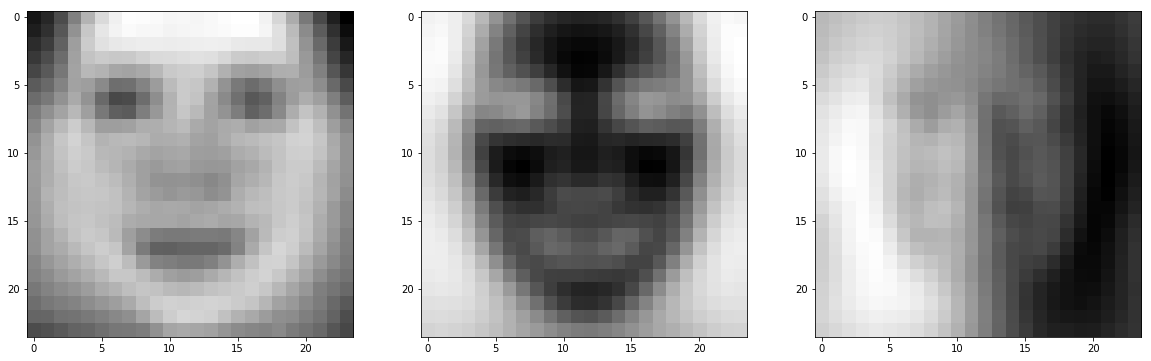

In [10]:
mu = np.mean(X)
print("Mean: "+str(mu))
fig, ax = plt.subplots(nrows = 1, ncols =3, figsize = (20, 6))
for i in range(3):
    alpha = 2*np.median(np.abs(W[:,i]))
    img = np.reshape(mu + alpha*V[i,:],(24,24)) 
    ax[i].imshow( img.T , cmap="gray") 
plt.show()

2(f)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


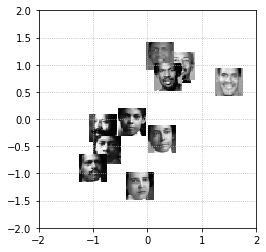

In [11]:
idx = [0,1,2,3,4,5,6,7,8,9,10]
coord, params = ml.transforms.rescale(W[:, 0:2])
plt.figure()
plt.hold(True)
for i in idx:
    loc = (coord[i,0], coord[i,0] + 0.5, coord[i,1], coord[i, 1] + 0.5) 
    img = np.reshape(X[i,:], (24,24))
    plt.imshow(img.T, cmap="gray", extent=loc)
    plt.axis((-2,2,-2,2))
plt.grid(linestyle='dotted')
plt.show()